In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import copy
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error
import scipy.stats as st
import warnings
from alive_progress import alive_bar
warnings.filterwarnings("ignore")

In [2]:
def print_graph(graph):
    edge_list = list(graph.edges())
    edge_degree = []
    for edge in edge_list:
        edge_degree.append(graph.degree(edge[0])+graph.degree(edge[1]) - 2)
    for i in range(len(edge_list)):
        nx.set_edge_attributes(
            graph, {edge_list[i]: {"Edge_degree": edge_degree[i]}})
    graph.edges(data=True)
    pos = nx.circular_layout(graph)
    edge_labels = nx.get_edge_attributes(graph, 'Edge_degree')
    nx.draw_circular(graph, with_labels=True, node_color='yellow')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)



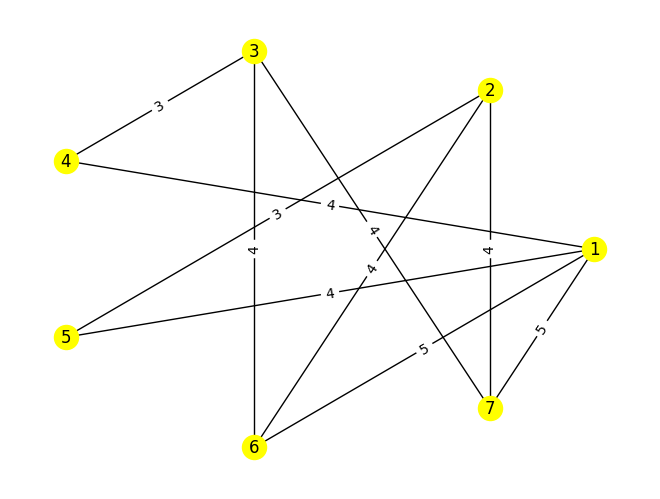

In [192]:
def cons_sei_graph_by_node(nodes=6, draw_graph=False):
    graph = nx.Graph(graph_type = 'SEI')
    if (nodes < 4):
        return print('Can not construct graph! Number of graph nodes must be > 5')
    for node in range(nodes):
        graph.add_node(node+1)
    nodes = np.array(graph.nodes())
    if (len(nodes) % 2 == 0):
        x = np.split(nodes, indices_or_sections=2)
        last = None
    else:
        last, y = nodes[-1], nodes[:-1]
        x = np.split(y, indices_or_sections=2)

    # -- UiVi
    for i in range(len(x[0])):
        graph.add_edge(x[0][i], x[1][i])
        if (last != None):
            graph.add_edge(x[0][i], last)
    # -- UiVj
    for i in range(len(x[0])):
        for j in range(i+1, len(x[0])):
            graph.add_edge(x[0][i], x[1][j])
        if (i-1 > 0):
            for j in range(i-1):
                graph.add_edge(x[0][i], x[1][j])
    if draw_graph:
        print_graph(graph)
    return graph


sei_graph = cons_sei_graph_by_node(7, draw_graph=True)


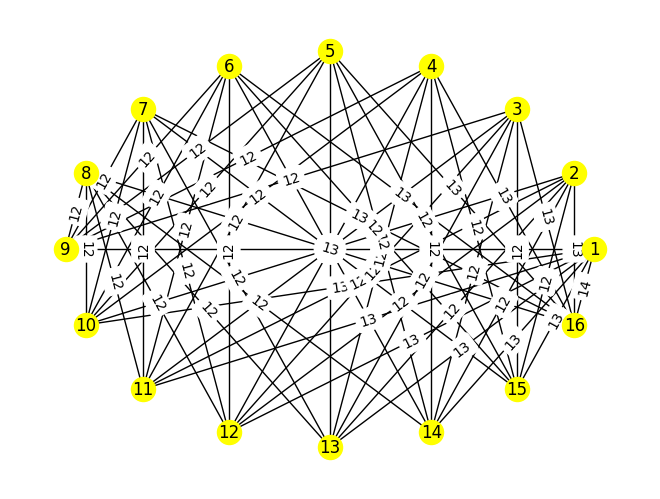

In [42]:
def cons_sei_graph_by_graph_degree(degree=3, draw_graph=False):
    graph = nx.Graph(graph_type = 'SEI')
    number_of_nodes = random.randrange(2*degree, 2*degree+2)
    if(degree < 3):
        return print('Can not construct graph! Graph degree must be > 2')
    for node in range(number_of_nodes):
        graph.add_node(node+1)
    nodes = np.array(graph.nodes())
    if (len(nodes) % 2 == 0):
        x = np.split(nodes, indices_or_sections=2)
        last = None
    else:
        last, y = nodes[-1], nodes[:-1]
        x = np.split(y, indices_or_sections=2)

    # -- UiVi
    for i in range(len(x[0])):
        graph.add_edge(x[0][i], x[1][i])
        if (last != None):
            graph.add_edge(x[0][i], last)
    # -- UiVj
    for i in range(len(x[0])):
        for j in range(i+1, len(x[0])):
            graph.add_edge(x[0][i], x[1][j])
        if (i-1 > 0):
            for j in range(i-1):
                graph.add_edge(x[0][i], x[1][j])
    if draw_graph:
        print_graph(graph)
    return graph


sei_graph = cons_sei_graph_by_graph_degree(8, draw_graph=True)


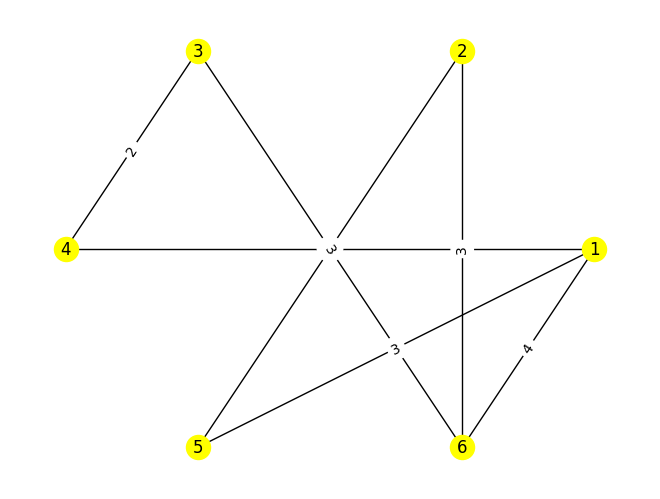

In [34]:
def cons_sei_graph_by_max_edge_degree(degree=4, draw_graph=False):
    graph = nx.Graph(graph_type='SEI')
    number_of_nodes = random.randrange(2*(degree-1), 2*degree)
    if(degree<4):
        return print('Can not construct graph! Max edge degree must be > 3')
    for node in range(number_of_nodes):
        graph.add_node(node+1)
    nodes = np.array(graph.nodes())
    if (len(nodes) % 2 == 0):
        x = np.split(nodes, indices_or_sections=2)
        last = None
    else:
        last, y = nodes[-1], nodes[:-1]
        x = np.split(y, indices_or_sections=2)

    # -- UiVi
    for i in range(len(x[0])):
        graph.add_edge(x[0][i], x[1][i])
        if (last != None):
            graph.add_edge(x[0][i], last)
    # -- UiVj
    for i in range(len(x[0])):
        for j in range(i+1, len(x[0])):
            graph.add_edge(x[0][i], x[1][j])
        if (i-1 > 0):
            for j in range(i-1):
                graph.add_edge(x[0][i], x[1][j])
    if draw_graph:
        print_graph(graph)
    return graph

sei_graph = cons_sei_graph_by_max_edge_degree(4, draw_graph=True)

In [44]:
edge_list = list(sei_graph.edges())
print(edge_list)
edge_degree = []
for edge in edge_list:
    edge_degree.append(sei_graph.degree(edge[0])+sei_graph.degree(edge[1]) - 2)


print(edge_degree)
print(len(edge_list), len(edge_degree))
print(edge_list[0])

[(1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 9), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 9), (4, 10), (5, 13), (5, 14), (5, 15), (5, 16), (5, 9), (5, 10), (5, 11), (6, 14), (6, 15), (6, 16), (6, 9), (6, 10), (6, 11), (6, 12), (7, 15), (7, 16), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (8, 16), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14)]
[13, 13, 13, 13, 13, 13, 13, 14, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 12]
57 57
(1, 9)


In [45]:
for i in range(len(edge_list)):
    nx.set_edge_attributes(sei_graph, {edge_list[i]: {"Edge_degree": edge_degree[i]}})
sei_graph.edges(data=True)


EdgeDataView([(1, 9, {'Edge_degree': 13}), (1, 10, {'Edge_degree': 13}), (1, 11, {'Edge_degree': 13}), (1, 12, {'Edge_degree': 13}), (1, 13, {'Edge_degree': 13}), (1, 14, {'Edge_degree': 13}), (1, 15, {'Edge_degree': 13}), (1, 16, {'Edge_degree': 14}), (2, 10, {'Edge_degree': 12}), (2, 11, {'Edge_degree': 12}), (2, 12, {'Edge_degree': 12}), (2, 13, {'Edge_degree': 12}), (2, 14, {'Edge_degree': 12}), (2, 15, {'Edge_degree': 12}), (2, 16, {'Edge_degree': 13}), (3, 11, {'Edge_degree': 12}), (3, 12, {'Edge_degree': 12}), (3, 13, {'Edge_degree': 12}), (3, 14, {'Edge_degree': 12}), (3, 15, {'Edge_degree': 12}), (3, 16, {'Edge_degree': 13}), (3, 9, {'Edge_degree': 12}), (4, 12, {'Edge_degree': 12}), (4, 13, {'Edge_degree': 12}), (4, 14, {'Edge_degree': 12}), (4, 15, {'Edge_degree': 12}), (4, 16, {'Edge_degree': 13}), (4, 9, {'Edge_degree': 12}), (4, 10, {'Edge_degree': 12}), (5, 13, {'Edge_degree': 12}), (5, 14, {'Edge_degree': 12}), (5, 15, {'Edge_degree': 12}), (5, 16, {'Edge_degree': 13}),

{(1, 9): Text(5.7119469709654425e-09, -4.9423335363977935e-08, '13'),
 (1, 10): Text(0.03806025339265062, -0.1913417325910441, '13'),
 (1, 11): Text(0.14644659053066417, -0.35355335843261204, '13'),
 (1, 12): Text(0.3086582163722321, -0.46193972537294775, '13'),
 (1, 13): Text(0.5000000088184136, -0.5000000028559737, '13'),
 (1, 14): Text(0.6913417893397145, -0.46193972537294775, '13'),
 (1, 15): Text(0.8535533257743158, -0.35355344783957865, '13'),
 (1, 16): Text(0.9619397821216181, -0.19134171768988298, '14'),
 (2, 10): Text(5.7119469709654425e-09, -5.7119473317879255e-09, '12'),
 (2, 11): Text(0.10838634284996052, -0.16221163155351526, '12'),
 (2, 12): Text(0.2705979686915284, -0.27059799849385097, '12'),
 (2, 13): Text(0.4619397611377099, -0.3086582759768769, '12'),
 (2, 14): Text(0.6532815416590108, -0.27059799849385097, '12'),
 (2, 15): Text(0.815493078093612, -0.16221172096048186, '12'),
 (2, 16): Text(0.9238795344409145, 9.189213778793004e-09, '13'),
 (3, 11): Text(-2.409037525

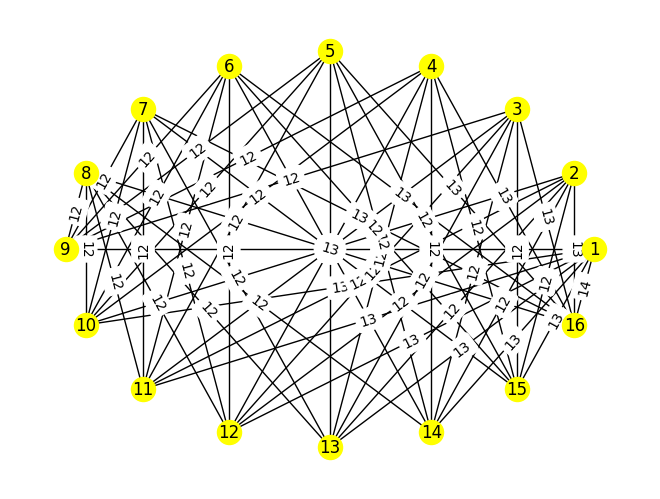

In [46]:
pos = nx.circular_layout(sei_graph)
nx.draw_circular(sei_graph, with_labels = True , node_color='yellow')
edge_labels = nx.get_edge_attributes(sei_graph, 'Edge_degree')
nx.draw_networkx_edge_labels(sei_graph, pos, edge_labels=edge_labels)

In [47]:
# Get adjacency matrix
A = nx.to_numpy_array(sei_graph)
print(A)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [48]:
# Calculate det of adjacency matrix
print(A.shape)
print(np.linalg.det(A))

(16, 16)
1.0


CALCULATE FRAGILITY

In [49]:
def fragility(graph):
    # Get adjacency matrix
    adjacency_matrix = nx.to_numpy_array(graph)
    # Calculate det of adjacency matrix
    eignevalues, eigenvectors = np.linalg.eig(adjacency_matrix)
    fragility = -max(eignevalues)
    return fragility

fragility(sei_graph)

-7.140054944640264

In [50]:
def get_edge_degree(graph):
    edge_list = list(graph.edges())
    edge_degree = []
    for edge in edge_list:
        edge_degree.append(graph.degree(edge[0])+graph.degree(edge[1]) - 2)
    return sorted(edge_degree)


In [51]:
def get_nodes_degree(graph):
    nodes_degree = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    return nodes_degree


def get_giant_component(graph):
    connected_components = sorted(
        nx.connected_components(graph), key=len, reverse=True)
    giant_component = connected_components[0]
    return connected_components, giant_component


In [57]:
def plot_graph(graph, fig_number, removed='node', title=None):
    plt.figure(fig_number)
    # nx.draw_networkx(graph, node_color='yellow')
    print_graph(graph)
    if title == None:
        plt.title("Initial graph")
    else:
        plt.title("Removed {}: {}".format(removed, title))


In [58]:
def edge_attack(graph, edge_removal='random', print_figures=False, connectivity_probability=0):
    df = pd.DataFrame(columns=['Removed Edge', 'Connected Components', 'Giant Components', 'Length of GC',
                      'Total Edges', 'Resilience', 'Total Resilience', 'Fragility'], dtype=object)
    init_graph_fragility = fragility(graph)
    total_resilience = 0
    total_nodes = len(graph.nodes)
    total_edges = len(graph.edges)
    edges_to_remove = round((1-connectivity_probability)*len(graph.edges))
    if print_figures:
        plot_graph(graph, -1)
    for i in range(edges_to_remove):
        if edge_removal == 'max_degree':
            edge_to_remove = get_edge_degree[0]
            graph.remove_edge(edge_to_remove[0], edge_to_remove[1])
        else:
            random_number = random.randrange(len(graph.edges))
            edge_to_remove = list(graph.edges)[random_number]
            graph.remove_edge(edge_to_remove[0], edge_to_remove[1])
        if print_figures:
            plot_graph(graph, i, removed='edge', title=edge_to_remove)
        CC, GC = get_giant_component(graph)
        total_edges = len(graph.edges)
        if len(GC) > 1:
            resilience = (len(GC)/(total_nodes**2))
            total_resilience += resilience
            subgraph_fragility = fragility(graph)
            # -- Print Data -- #
            df.loc[i] = [edge_to_remove, CC, GC, len(GC), total_edges, resilience,
                         total_resilience, subgraph_fragility]
            GC_graph = graph.subgraph(CC[0])
            graph = nx.Graph(GC_graph)
        else:
            break
    return df, total_resilience, init_graph_fragility


Resilience: 1.24, Fragility: -4.236067977499787


,Removed Edge,Connected Components,Giant Components,Length of GC,Total Edges,Resilience,Total Resilience,Fragility
0,"(1, 7)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,20,0.10,0.10,-4.051691+0.000000j
1,"(3, 6)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,19,0.10,0.20,-3.883492+0.000000j
2,"(3, 9)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,18,0.10,0.30,-3.744826+0.000000j
3,"(5, 8)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,17,0.10,0.40,-3.565294+0.000000j
4,"(1, 6)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,16,0.10,0.50,-3.412574-0.000000j
5,"(2, 9)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,15,0.10,0.60,-3.225335-0.000000j
6,"(5, 10)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,14,0.10,0.70,-2.997826+0.000000j
7,"(2, 7)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,13,0.10,0.80,-2.837710+0.000000j
8,"(2, 8)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,12,0.10,0.90,-2.704926+0.000000j
9,"(1, 10)","[{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}",10,11,0.10,1.00,-2.454824+0.000000j


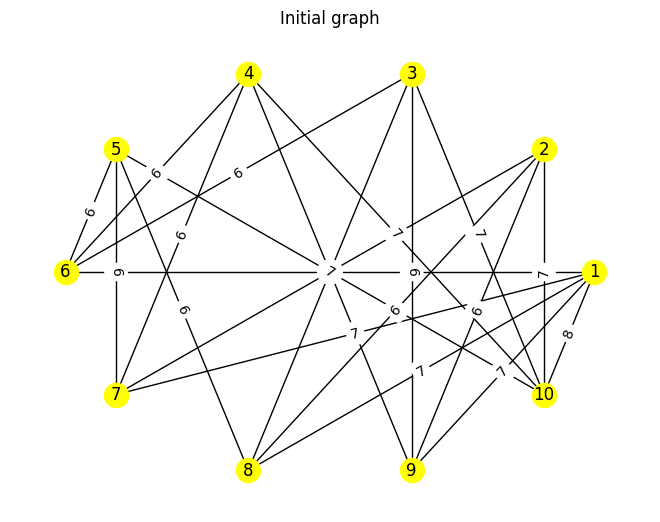

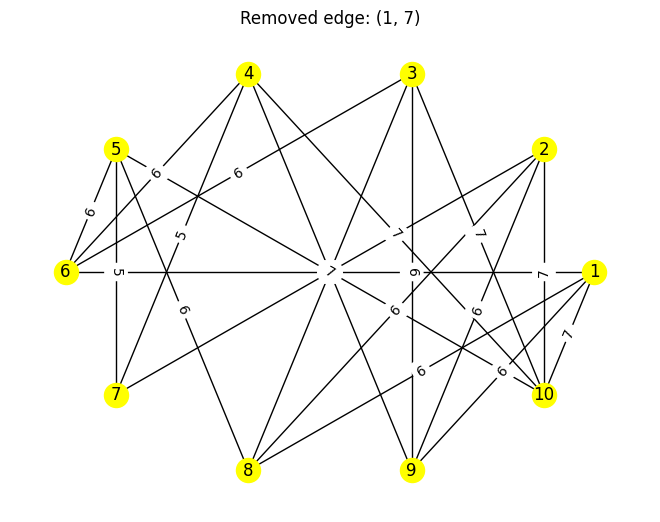

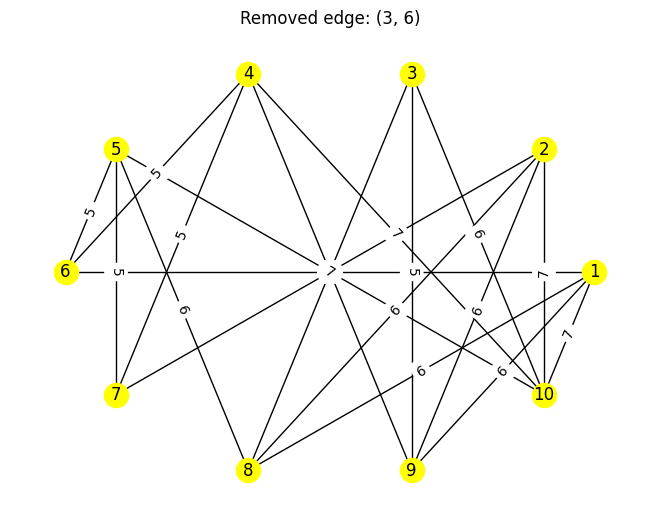

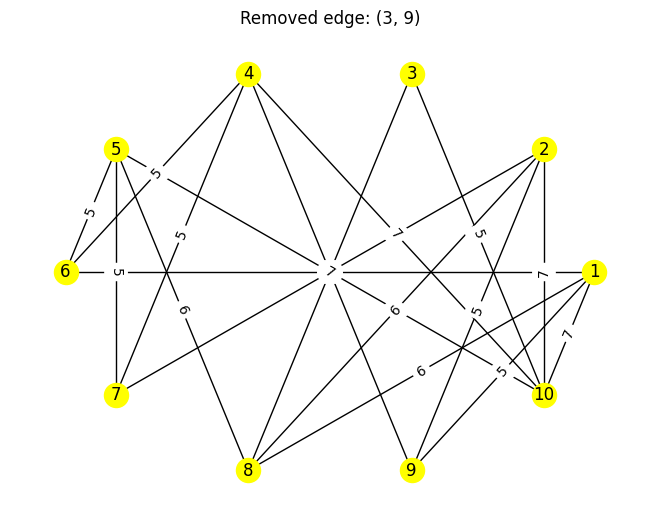

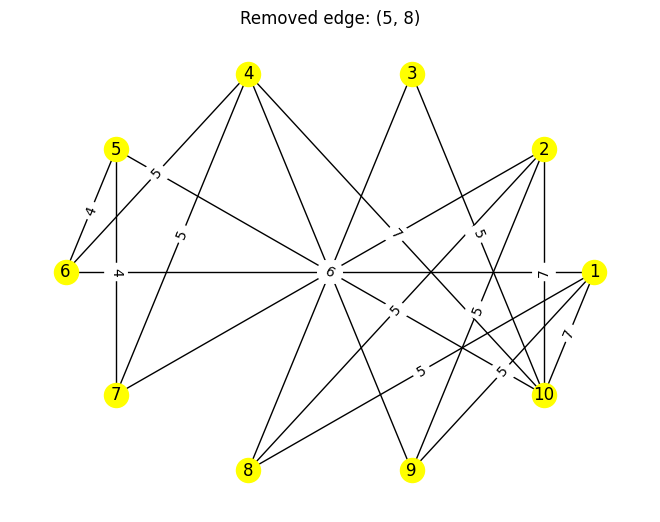

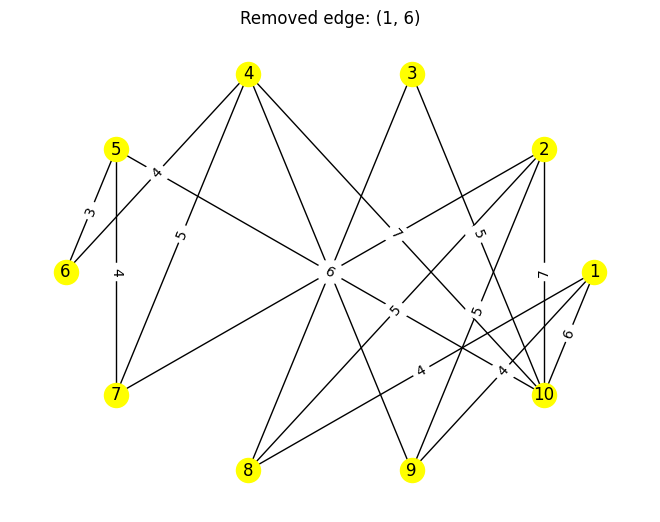

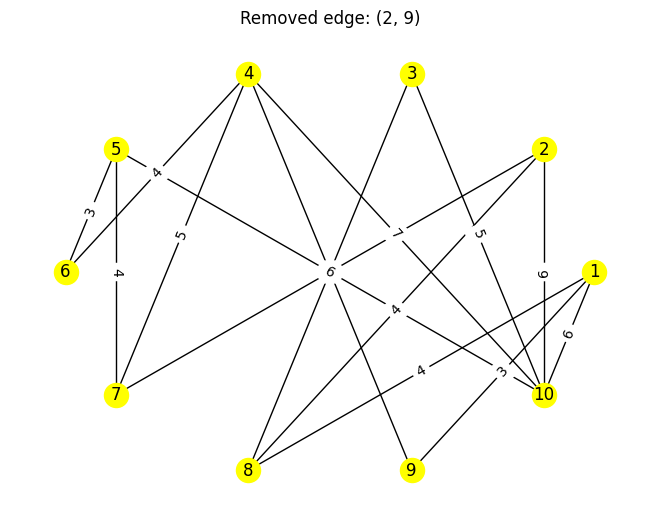

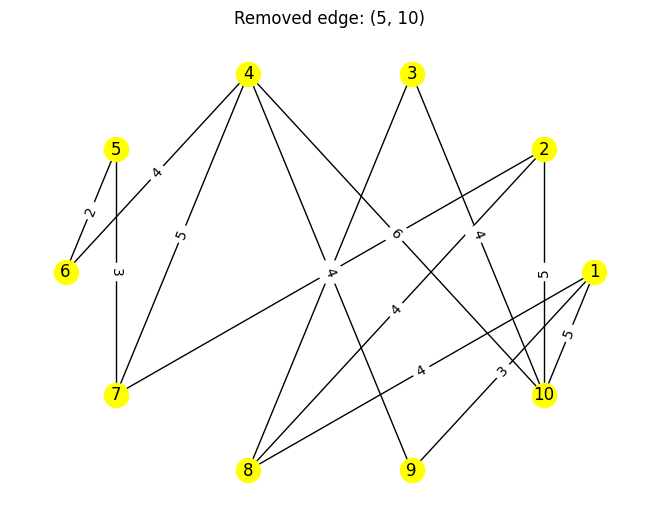

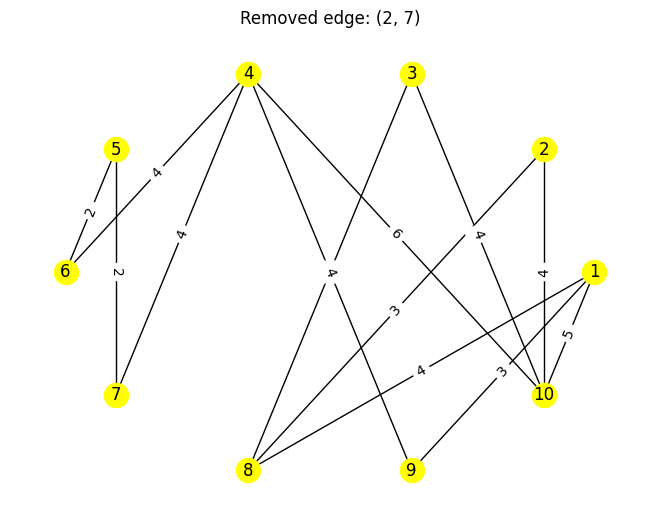

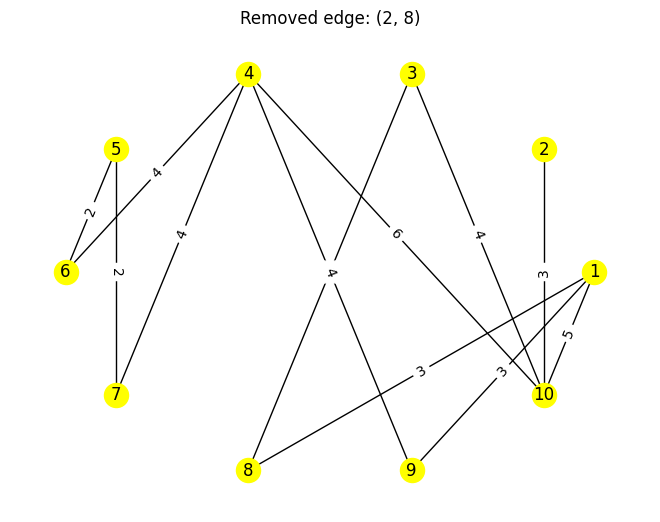

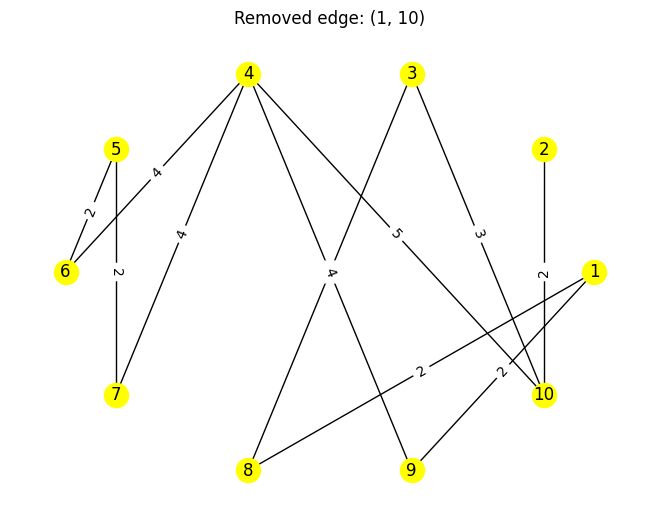

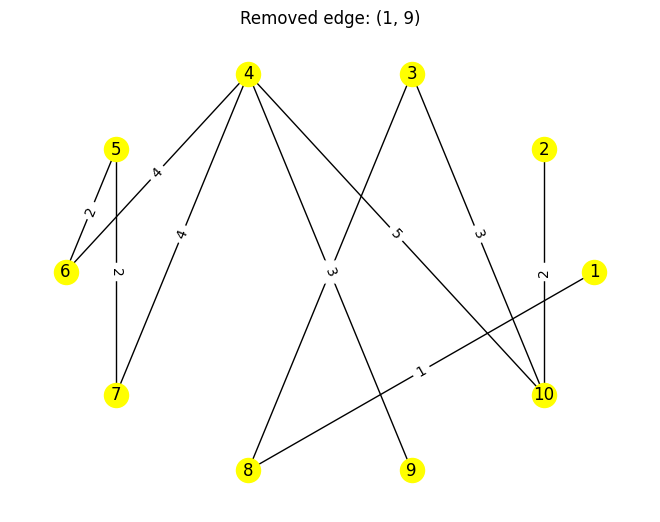

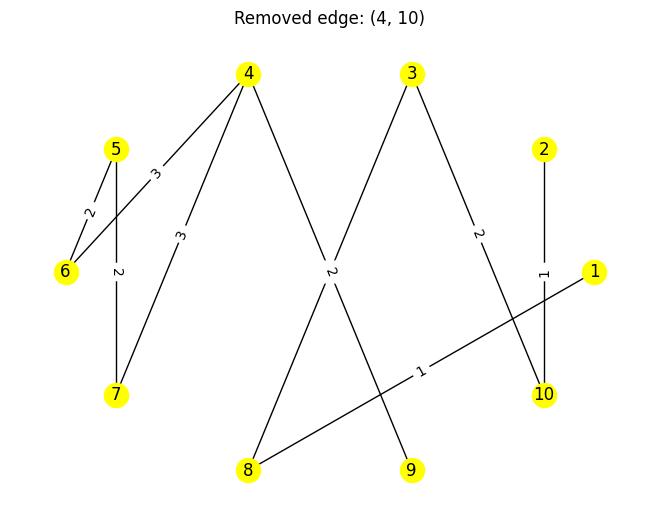

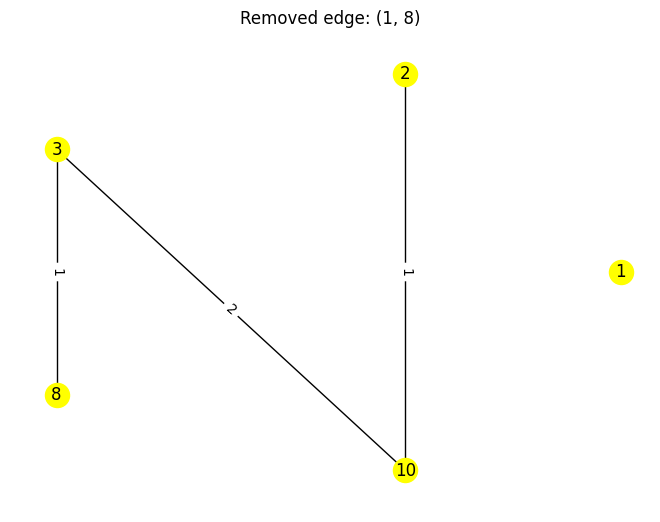

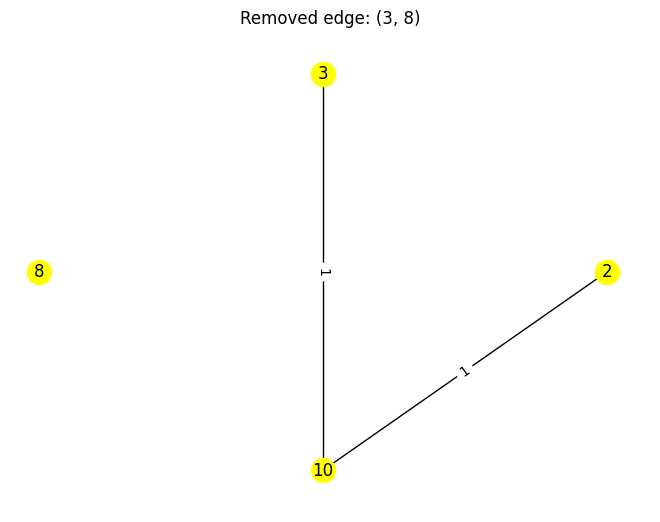

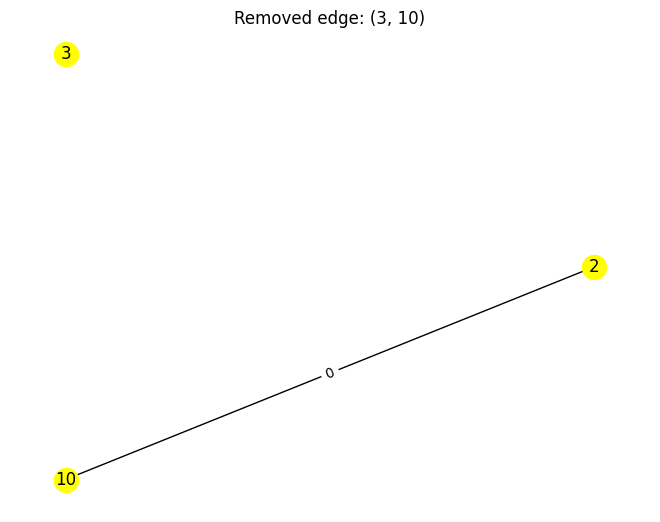

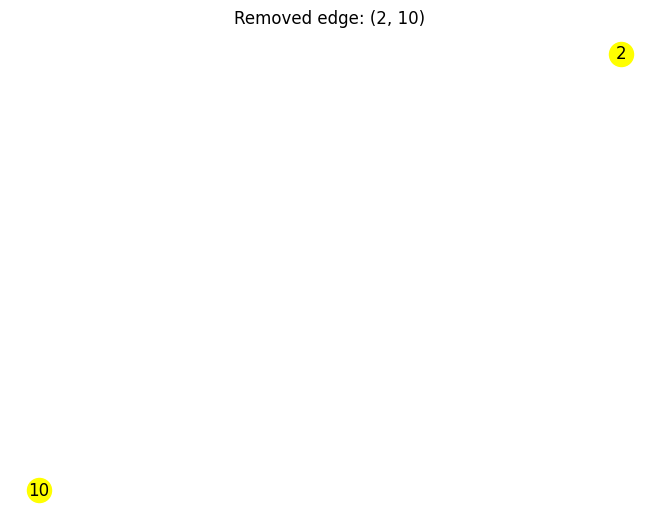

In [59]:
dummy_graph = cons_sei_graph_by_node(10)
output, total_resilience, curr_fragility = edge_attack(
    dummy_graph, edge_removal='random', print_figures=True, connectivity_probability=0.0)
print("Resilience: {}, Fragility: {}".format(total_resilience, curr_fragility))
output


In [63]:
def node_attack(graph, node_removal = 'random', print_figures = False, connectivity_probability=0):
    df = pd.DataFrame(columns=['Removed Node', 'Connected Components', 'Giant Components', 'Length of GC',
                      'Total Nodes', 'Resilience', 'Total Resilience', 'Fragility'], dtype=object)
    nodes_degree = get_nodes_degree(graph)
    init_graph_fragility = fragility(graph)
    total_resilience = 0
    total_nodes = len(graph.nodes)
    nodes_to_remove = round((1-connectivity_probability)*len(graph.nodes))
    if print_figures:
        plot_graph(graph, -1)
    for i in range(nodes_to_remove):
        if node_removal == 'max_degree':
            node_to_remove = nodes_degree[i][0]
            graph.remove_node(node_to_remove)
        else:
            random_number = random.randrange(len(graph.nodes))
            node_to_remove = list(graph.nodes)[random_number]
            graph.remove_node(node_to_remove)
        if print_figures:
            plot_graph(graph, i, removed='node', title=node_to_remove)
        CC, GC = get_giant_component(graph)
        if len(GC) > 1 :
            resilience = (len(GC)/(total_nodes**2))
            total_resilience += resilience
            subgraph_fragility = fragility(graph)
            # -- Print Data -- #
            df.loc[i] = [node_to_remove, CC, GC, len(GC), total_nodes, resilience,
                total_resilience, subgraph_fragility]
        else:
            break
    return df, total_resilience, init_graph_fragility


Resilience: 0.41999999999999993, Fragility: -4.236067977499787


,Removed Node,Connected Components,Giant Components,Length of GC,Total Nodes,Resilience,Total Resilience,Fragility
0,5,"[{1, 2, 3, 4, 6, 7, 8, 9, 10}]","{1, 2, 3, 4, 6, 7, 8, 9, 10}",9,10,0.09,0.09,-3.855575
1,4,"[{1, 2, 3, 6, 7, 8, 9, 10}]","{1, 2, 3, 6, 7, 8, 9, 10}",8,10,0.08,0.17,-3.427034
2,2,"[{1, 3, 6, 7, 8, 9, 10}]","{1, 3, 6, 7, 8, 9, 10}",7,10,0.07,0.24,-2.920810
3,9,"[{1, 3, 6, 7, 8, 10}]","{1, 3, 6, 7, 8, 10}",6,10,0.06,0.30,-2.557612
4,6,"[{1, 3, 7, 8, 10}]","{1, 3, 7, 8, 10}",5,10,0.05,0.35,-2.135779
5,8,"[{1, 10, 3, 7}]","{1, 10, 3, 7}",4,10,0.04,0.39,-1.618034
6,7,"[{1, 10, 3}]","{1, 10, 3}",3,10,0.03,0.42,-1.414214


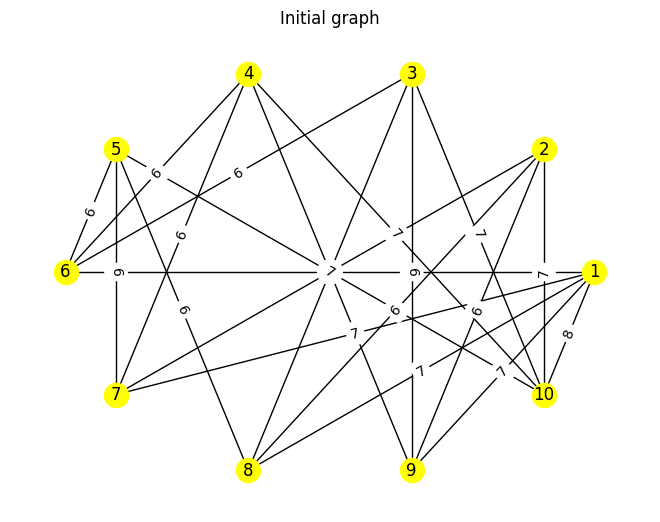

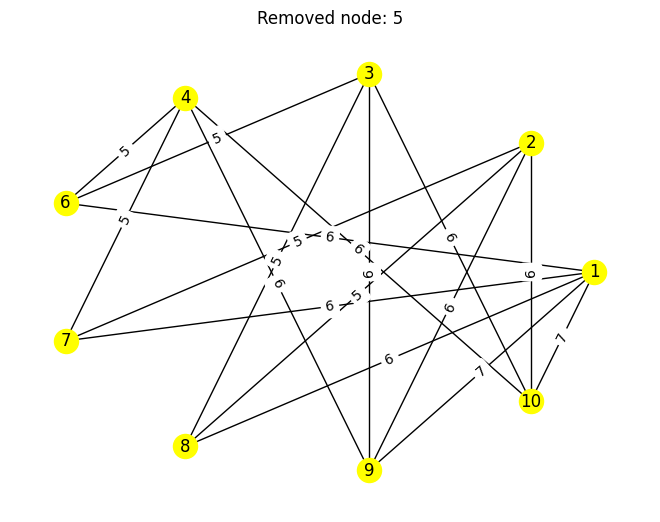

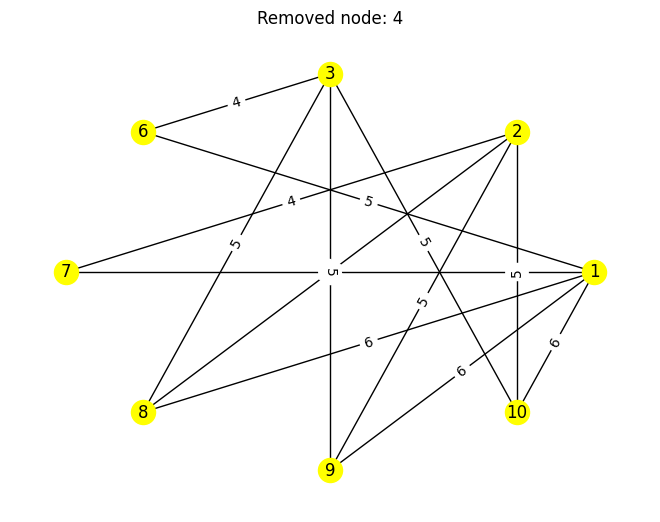

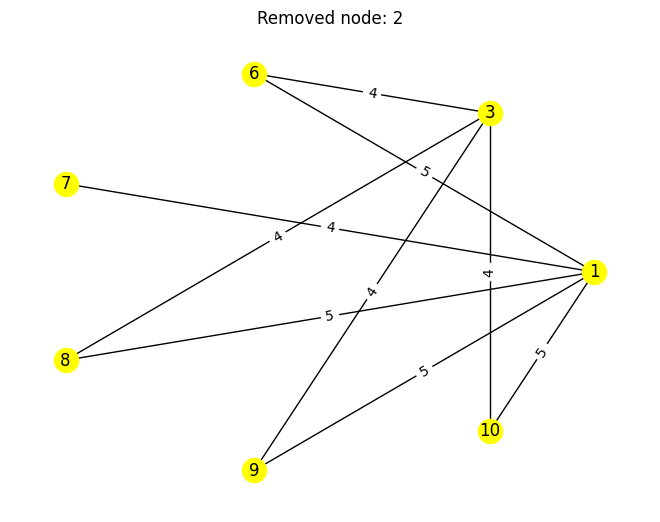

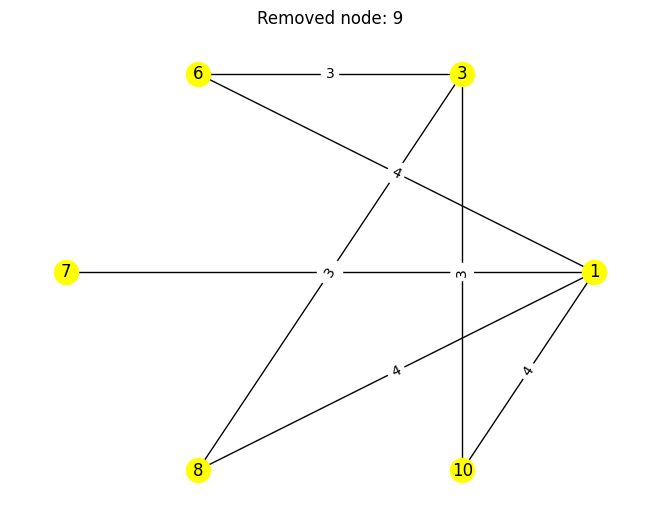

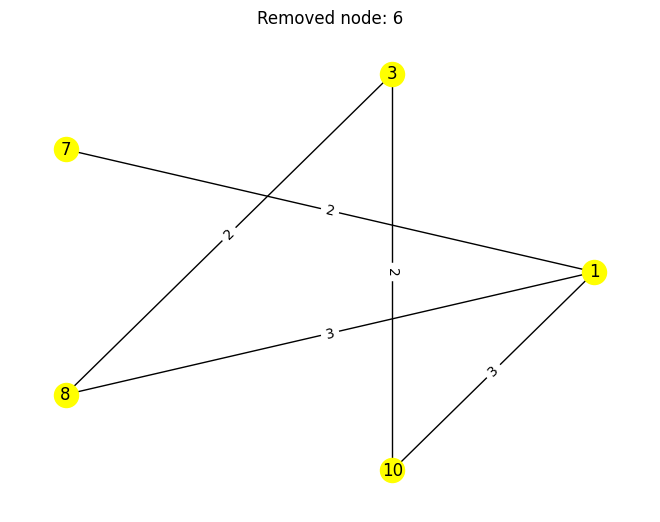

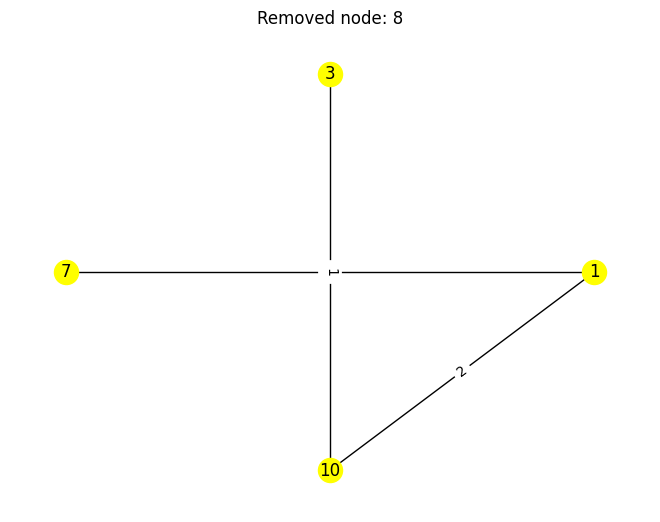

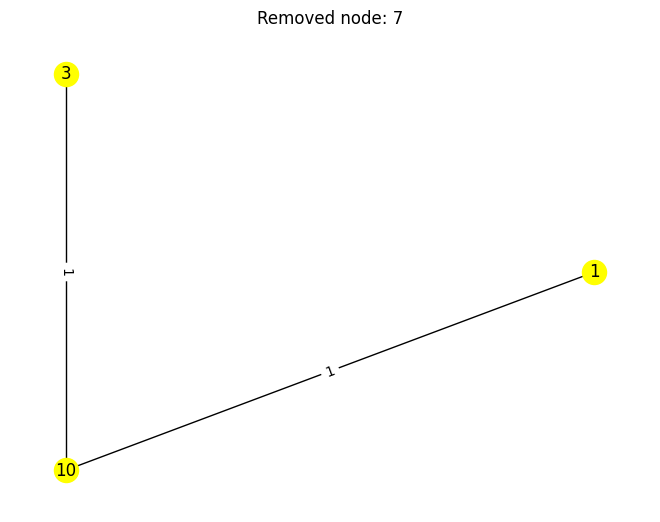

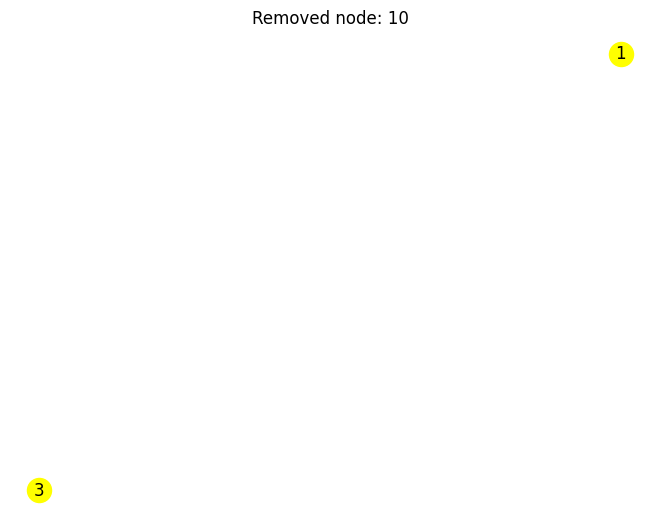

In [65]:
dummy_graph = cons_sei_graph_by_node(10)
output, total_resilience, curr_fragility = node_attack(
    dummy_graph, node_removal='random', print_figures=True, connectivity_probability=0)
print("Resilience: {}, Fragility: {}".format(total_resilience, curr_fragility))
output


In [66]:
def simulate_node_attack(iteration , graph, connectivity_probability):
    df = pd.DataFrame(columns=['Resilience', 'Fragility'], dtype=object)
    dummy_graph = cons_sei_graph_by_node(10)
    for i in range(iteration):
        x = copy.deepcopy(graph)
        output, total_resilience, curr_fragility = node_attack(x, connectivity_probability=connectivity_probability)
        df.loc[i] = [float(total_resilience), float(curr_fragility)]
    return df


In [67]:
# dummy_graph = cons_sni_graph_by_nodes(5)
dummy_graph = cons_sei_graph_by_node(10)
node_attack_output = simulate_node_attack(50, dummy_graph, 0)
node_attack_output


,Resilience,Fragility
0,0.44,-4.236068
1,0.41,-4.236068
2,0.42,-4.236068
3,0.43,-4.236068
4,0.43,-4.236068
5,0.40,-4.236068
6,0.44,-4.236068
7,0.44,-4.236068
8,0.44,-4.236068
9,0.40,-4.236068


In [68]:
def simulate_edge_attack(iteration, graph, connectivity_probability):
    df = pd.DataFrame(columns=['Resilience', 'Fragility'], dtype=object)
    for i in range(iteration):
        x = copy.deepcopy(graph)
        output, total_resilience, curr_fragility = edge_attack(x, connectivity_probability=connectivity_probability)
        df.loc[i] = [float(total_resilience), float(curr_fragility)]
    return df


In [69]:
# dummy_graph = cons_sni_graph_by_nodes(5)
dummy_graph = cons_sei_graph_by_node(10)
edge_attack_output = simulate_edge_attack(20, dummy_graph, 0)
edge_attack_output


,Resilience,Fragility
0,1.37,-4.236068
1,1.58,-4.236068
2,1.45,-4.236068
3,1.53,-4.236068
4,1.39,-4.236068
5,1.53,-4.236068
6,1.49,-4.236068
7,1.37,-4.236068
8,1.52,-4.236068
9,1.43,-4.236068


In [70]:
resilience_mean, fragility_mean = edge_attack_output.mean(axis=0)
resilience_mean_array = np.full((len(edge_attack_output), 1), resilience_mean)
fragility_mean_array = np.full((len(edge_attack_output), 1), fragility_mean)

resilience_error = mean_squared_error(resilience_mean_array, edge_attack_output['Resilience'])
fragility_error = mean_squared_error(fragility_mean_array, edge_attack_output['Fragility'])
resilience_error, fragility_error

(0.004241000000000007, 0.0)

In [71]:
coefficient_variation = st.variation(edge_attack_output['Resilience'])
standard_deviation = st.gstd(edge_attack_output['Resilience'])
coefficient_variation, standard_deviation

(0.044391929530102105, 1.0465269024403128)

In [73]:
fragility_ci = st.norm.interval(0.95, loc=fragility_mean, scale=fragility_error)
resilience_ci = st.norm.interval(0.95, loc=resilience_mean, scale=resilience_error)
fragility_ci, resilience_ci


((nan, nan), (1.4586877927415658, 1.4753122072584344))

In [74]:
def calculate_poly(simulation_output, poly_degree=2):
    return np.polynomial.polynomial.Polynomial.fit(simulation_output['Resilience'], simulation_output["Fragility"], poly_degree)


In [75]:
calculate_poly(edge_attack_output, 2)


Polynomial([-4.23606798e+00, -5.94666057e-16,  8.60694099e-16], domain=[1.37, 1.59], window=[-1.,  1.])

In [157]:
def simulate(simulation_time):
    resilience_df = pd.DataFrame(columns=['Graph Degree', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
    fragility_df = pd.DataFrame(columns=[
                                    'Graph Degree', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
    for i in range(simulation_time):
        res_data , frag_data = [], []
        d = random.randint(6, 80)
        graph = cons_sei_graph_by_node(d)
        c = 0
        res_data.append(d)
        frag_data.append(d)
        for j in range(10):
            x = copy.deepcopy(graph)
            df, res, frag = node_attack(x, connectivity_probability=c)
            res_data.append(res)
            frag_data.append(float(frag))
            c= c+0.1
        resilience_df.loc[i] = res_data
        fragility_df.loc[i] = frag_data
    return resilience_df, fragility_df


In [164]:
resilience_df , fragility_df = simulate(100)

In [165]:
resilience_df

,Graph Degree,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,22.0,0.473140,0.460744,0.464876,0.433884,0.402893,0.363636,0.316116,0.260331,0.161157,0.084711
1,44.0,0.488120,0.485537,0.470041,0.448347,0.409607,0.369318,0.320764,0.248450,0.181302,0.085744
2,67.0,0.492315,0.487859,0.475162,0.450212,0.414346,0.374916,0.318779,0.251726,0.173758,0.098240
3,31.0,0.477627,0.480749,0.468262,0.446410,0.415193,0.374610,0.305931,0.243496,0.171696,0.090531
4,71.0,0.492759,0.488792,0.474906,0.451299,0.417973,0.374926,0.313827,0.249950,0.176354,0.093037
...,...,...,...,...,...,...,...,...,...,...,...
95,56.0,0.489158,0.486288,0.473533,0.447704,0.417411,0.370536,0.312181,0.254783,0.175383,0.100446
96,77.0,0.492495,0.488784,0.475797,0.450835,0.415078,0.368528,0.318941,0.252150,0.174566,0.097824
97,58.0,0.491082,0.486920,0.471760,0.450951,0.416171,0.370690,0.314507,0.247622,0.183710,0.097206
98,34.0,0.484429,0.481834,0.467128,0.446367,0.406574,0.367647,0.320934,0.246540,0.181661,0.083045


In [166]:
resilience_standard_deviation, resilience_coefficient_of_variation = [], []
for i in range(resilience_df.shape[1]-1):
    resilience_standard_deviation.append(st.gstd(resilience_df.iloc[:,i+1]))
    resilience_coefficient_of_variation.append(
        st.variation(resilience_df.iloc[:, i+1]))

print('Standard Deviation: ')
print(resilience_standard_deviation)
print()
print('Coefficient of Variation:')
print(resilience_coefficient_of_variation)


Standard Deviation: 
[1.070318750243675, 1.0566105827797458, 1.0690421695091155, 1.0333173240783584, 1.0260513097736994, 1.0222897999349123, 1.0391116396748903, 1.0420710258322503, 1.0567666129519169, 1.094696490380171]

Coefficient of Variation:
[0.06006816295692049, 0.05003891470665269, 0.056197366949210216, 0.031083467306851083, 0.024565029370809975, 0.021469618344024388, 0.03588801944540266, 0.038823798445110864, 0.05320908076828193, 0.09336262868280785]


In [167]:
fragility_df

,Graph Degree,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,22.0,-10.099020,-10.099020,-10.099020,-10.099020,-10.099020,-10.099020,-10.099020,-10.099020,-10.099020,-10.099020
1,44.0,-21.047512,-21.047512,-21.047512,-21.047512,-21.047512,-21.047512,-21.047512,-21.047512,-21.047512,-21.047512
2,67.0,-32.542251,-32.542251,-32.542251,-32.542251,-32.542251,-32.542251,-32.542251,-32.542251,-32.542251,-32.542251
3,31.0,-14.594198,-14.594198,-14.594198,-14.594198,-14.594198,-14.594198,-14.594198,-14.594198,-14.594198,-14.594198
4,71.0,-34.539808,-34.539808,-34.539808,-34.539808,-34.539808,-34.539808,-34.539808,-34.539808,-34.539808,-34.539808
...,...,...,...,...,...,...,...,...,...,...,...
95,56.0,-27.036986,-27.036986,-27.036986,-27.036986,-27.036986,-27.036986,-27.036986,-27.036986,-27.036986,-27.036986
96,77.0,-37.536630,-37.536630,-37.536630,-37.536630,-37.536630,-37.536630,-37.536630,-37.536630,-37.536630,-37.536630
97,58.0,-28.035669,-28.035669,-28.035669,-28.035669,-28.035669,-28.035669,-28.035669,-28.035669,-28.035669,-28.035669
98,34.0,-16.062258,-16.062258,-16.062258,-16.062258,-16.062258,-16.062258,-16.062258,-16.062258,-16.062258,-16.062258


In [168]:
fragility_standard_deviation, fragility_coefficient_of_variation = [], []
for i in range(fragility_df.shape[1]-1):
    fragility_standard_deviation.append(st.tstd(fragility_df.iloc[:, i+1]))
    fragility_coefficient_of_variation.append(
        st.variation(fragility_df.iloc[:, i+1]))

print('Standard Deviation: ')
print(fragility_standard_deviation)
print()
print('Coefficient of Variation:')
print(fragility_coefficient_of_variation)


Standard Deviation: 
[11.066069305775546, 11.066069305775546, 11.066069305775546, 11.066069305775546, 11.066069305775546, 11.066069305775546, 11.066069305775546, 11.066069305775546, 11.066069305775546, 11.066069305775546]

Coefficient of Variation:
[-0.4889328108238406, -0.4889328108238406, -0.4889328108238406, -0.4889328108238406, -0.4889328108238406, -0.4889328108238406, -0.4889328108238406, -0.4889328108238406, -0.4889328108238406, -0.4889328108238406]


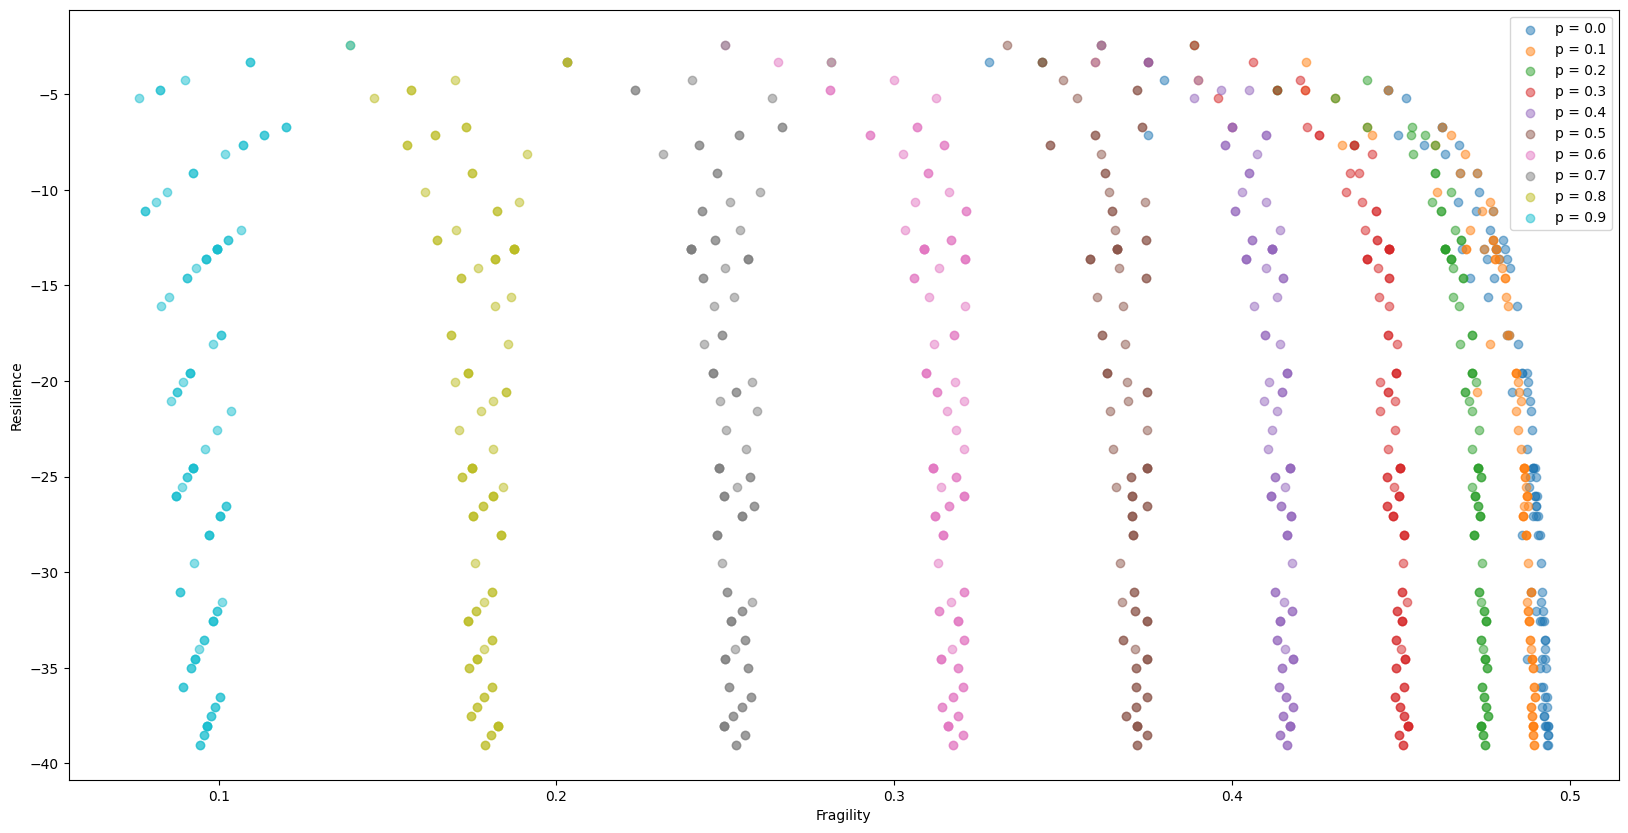

In [169]:
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(1,11):
    legend = 'p = '+ str((i-1)/10)
    ax.scatter(x=resilience_df.iloc[:, i], y=fragility_df.iloc[:, i], alpha=0.5, label=legend)
plt.xlabel("Fragility")
plt.ylabel("Resilience")
ax.legend()


In [183]:
def simulate(simulation_time):
    resilience_df = pd.DataFrame(columns=['Graph Degree', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
    fragility_df = pd.DataFrame(columns=[
                                'Graph Degree', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9'])
    for i in range(simulation_time):
        res_data , frag_data = [], []
        d = random.randint(6, 30)
        graph = cons_sei_graph_by_node(d)
        c = 0
        res_data.append(d)
        frag_data.append(d)
        for j in range(10):
            x = copy.deepcopy(graph)
            df, res, frag = edge_attack(x, connectivity_probability=c)
            res_data.append(res)
            frag_data.append(float(frag))
            c= c+0.1
        resilience_df.loc[i] = res_data
        fragility_df.loc[i] = frag_data
    return resilience_df, fragility_df


In [184]:
resilience_df, fragility_df = simulate(100)


In [185]:
resilience_df

,Graph Degree,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,16.0,2.898438,2.734375,2.781250,2.421875,2.125000,1.750000,1.437500,1.062500,0.687500,0.375000
1,20.0,3.887500,3.857500,3.605000,3.192500,2.750000,2.300000,1.800000,1.350000,0.900000,0.450000
2,16.0,2.828125,2.855469,2.773438,2.500000,2.113281,1.750000,1.437500,1.062500,0.687500,0.375000
3,24.0,4.845486,4.710069,4.336806,3.875000,3.333333,2.750000,2.208333,1.666667,1.125000,0.541667
4,29.0,5.909631,5.942925,5.423306,4.758621,4.068966,3.379310,2.724138,2.034483,1.344828,0.689655
...,...,...,...,...,...,...,...,...,...,...,...
95,24.0,4.845486,4.750000,4.355903,3.862847,3.333333,2.750000,2.208333,1.666667,1.125000,0.541667
96,28.0,5.695153,5.715561,5.214286,4.571429,3.923469,3.285714,2.607143,1.964286,1.321429,0.642857
97,8.0,0.953125,1.109375,1.031250,0.953125,0.890625,0.750000,0.625000,0.500000,0.375000,0.125000
98,28.0,5.812500,5.658163,5.197704,4.571429,3.928571,3.285714,2.607143,1.964286,1.321429,0.642857


In [186]:
resilience_standard_deviation, resilience_coefficient_of_variation = [], []
for i in range(resilience_df.shape[1]-1):
    resilience_standard_deviation.append(st.gstd(resilience_df.iloc[:,i+1]))
    resilience_coefficient_of_variation.append(
        st.variation(resilience_df.iloc[:, i+1]))

print('Standard Deviation: ')
print(resilience_standard_deviation)
print()
print('Coefficient of Variation:')
print(resilience_coefficient_of_variation)


Standard Deviation: 
[1.9614823771642298, 1.8994654980053904, 1.889303386092113, 1.8014400014155383, 1.763576636851271, 1.7409118999021433, 1.7073755256959091, 1.7041887747988065, 1.7377897508483564, 1.663935567781911]

Coefficient of Variation:
[0.48642979082574694, 0.4778623406574955, 0.4607010708296313, 0.44179621752898773, 0.43129264667576644, 0.4318062449395881, 0.4228625997659781, 0.4205707519484974, 0.42805352078073733, 0.40794569265019714]


In [187]:
fragility_df

,Graph Degree,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,16.0,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055
1,20.0,-9.109772,-9.109772,-9.109772,-9.109772,-9.109772,-9.109772,-9.109772,-9.109772,-9.109772,-9.109772
2,16.0,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055,-7.140055
3,24.0,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170
4,29.0,-13.601073,-13.601073,-13.601073,-13.601073,-13.601073,-13.601073,-13.601073,-13.601073,-13.601073,-13.601073
...,...,...,...,...,...,...,...,...,...,...,...
95,24.0,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170,-11.090170
96,28.0,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473
97,8.0,-3.302776,-3.302776,-3.302776,-3.302776,-3.302776,-3.302776,-3.302776,-3.302776,-3.302776,-3.302776
98,28.0,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473,-13.076473


In [188]:
fragility_standard_deviation, fragility_coefficient_of_variation = [], []
for i in range(fragility_df.shape[1]-1):
    fragility_standard_deviation.append(st.tstd(fragility_df.iloc[:, i+1]))
    fragility_coefficient_of_variation.append(
        st.variation(fragility_df.iloc[:, i+1]))

print('Standard Deviation: ')
print(fragility_standard_deviation)
print()
print('Coefficient of Variation:')
print(fragility_coefficient_of_variation)


Standard Deviation: 
[3.709525127251529, 3.709525127251529, 3.709525127251529, 3.709525127251529, 3.709525127251529, 3.709525127251529, 3.709525127251529, 3.709525127251529, 3.709525127251529, 3.709525127251529]

Coefficient of Variation:
[-0.41443723163280843, -0.41443723163280843, -0.41443723163280843, -0.41443723163280843, -0.41443723163280843, -0.41443723163280843, -0.41443723163280843, -0.41443723163280843, -0.41443723163280843, -0.41443723163280843]


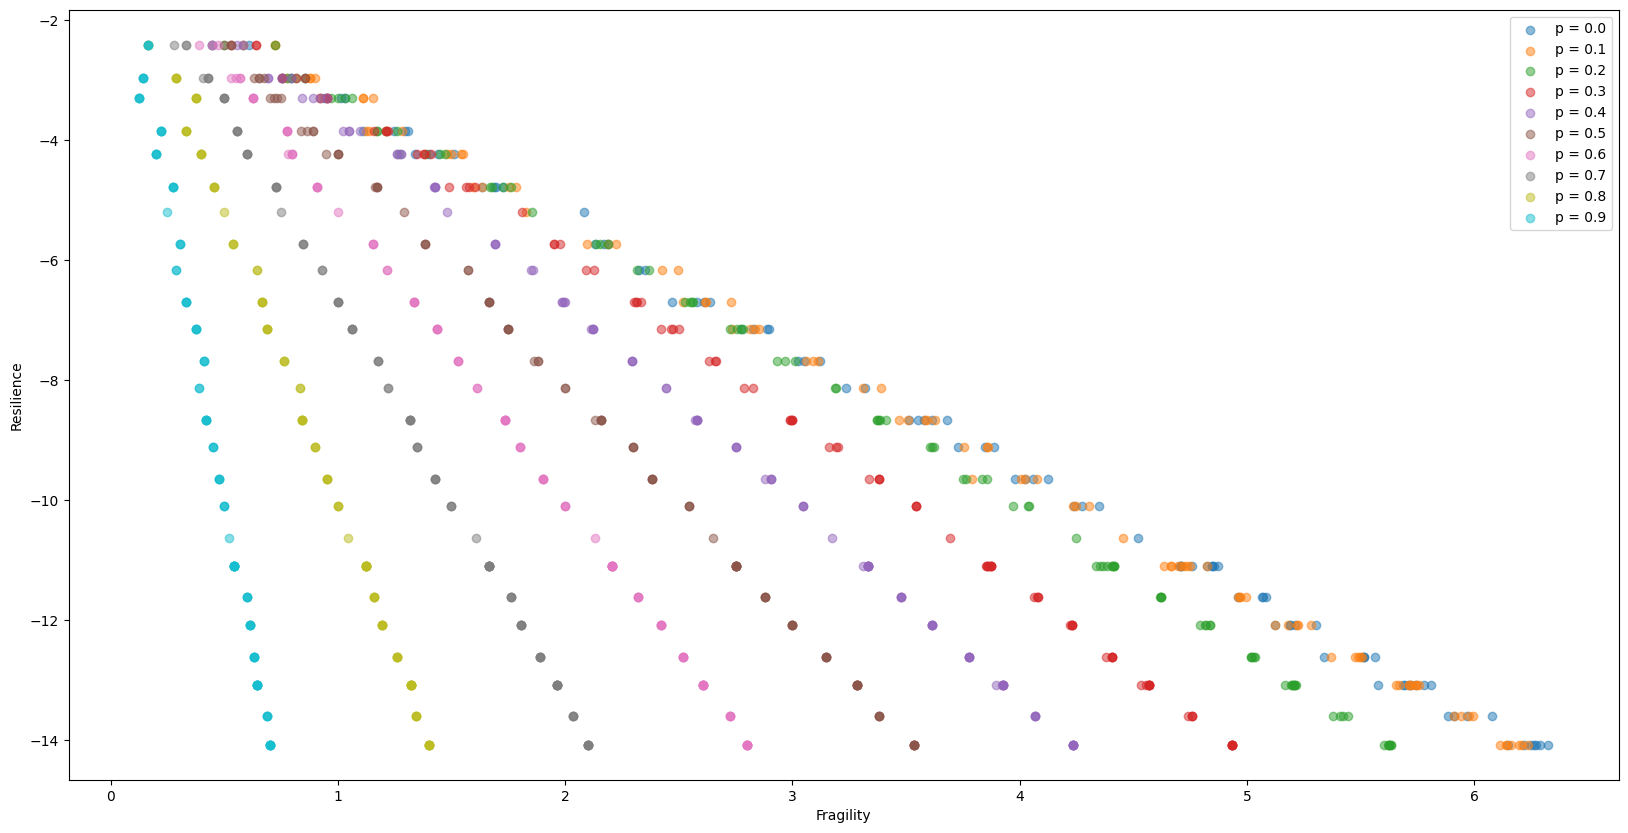

In [189]:
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(1,11):
    legend = 'p = '+ str((i-1)/10)
    ax.scatter(x=resilience_df.iloc[:, i], y=fragility_df.iloc[:, i], alpha=0.5, label=legend)
plt.xlabel("Fragility")
plt.ylabel("Resilience")
ax.legend()
